## Final Project Submission

Please fill out:
* Student name: Josphat Kimani
* Student pace: full time
* Scheduled project review date/time: 10th December 2023
* Instructor name: Mark Tiba 
* Blog post URL:


# Phase 1 Project - Microsoft Studios Movie Project

## 1. Introduction

Microsoft, a global leader in technology, is venturing into uncharted territory by establishing a new movie studio.This bold move signifies Microsoft's ambition to diversify and tap into the lucrative and creative world of filmmaking. The film industry, with its dynamic trends and evolving consumer preferences, presents a unique set of challenges and opportunities. As Microsoft steps into this arena, it is crucial to leverage data-driven insights to guide strategic decisions in film production.

## 2. Business Understanding

### 2.1. Problem Statment 

The primary challenge for Microsoft's new movie studio is the lack of experience and established presence in the film industry. The studio needs to understand the current market dynamics, audience preferences, and successful film characteristics to make informed decisions. With the rapidly changing landscape of film genres, production technologies, and distribution channels, Microsoft must identify and capitalize on the most promising opportunities to ensure both critical and commercial success.

### 2.2 Objectives

1. Market Trend Analysis: To analyze current box office trends, identifying which film genres, themes, and styles are most successful and why.

2. Financial Feasibility and ROI: To evaluate the financial aspects of film production, understanding the correlation between budget allocations and box office success to maximize return on investment.

3. Competitive Strategy Formulation: To assess the competitive landscape of the film industry and develop a unique strategy that leverages Microsoft's technological prowess and aligns with market demands.

### 2.3 Research Questions

1. What Genres Perform Best at the Box Office?

2. How do budget sizes correlate with box office success, and what are the average production costs of the most successful films?

3. What is the Impact of Release Timing on Box Office Performance?

4. Which Studios are Producing the Most Successful Films?

## 3. Data Understanding    

For this analysis, we are utilizing four datasets, namely bom.movie_gross.csv,rt.reviews.tsv,im.db and tn.movie_budgets.csv. These datasets provide comprehensive information on movie gross earnings and movie budgets, respectively. The features of each dataset are outlined below:

3.1. Box Office Mojo Dataset (bom.movie_gross.csv):

- title: The name of the movie.
- studio: The production studio responsible for the movie.
- domestic_gross: Total box office earnings in the movie's country of origin.
- foreign_gross: Total box office earnings in countries other than the movie's country of origin.
- year: The year in which the movie was released.

3.2. The Numbers Movie Budgets Dataset (tn.movie_budgets.csv):

- id: A unique identifier for each movie.
- release_date: The date on which the movie was released.
- movie: The title of the movie.
- production_budget: The budget allocated for the production of the movie.
- domestic_gross: The gross earnings from domestic box office.
- worldwide_gross: The total gross earnings from box offices around the world.

3.3.  IMDB Movies:(im.db)
- genre_ids: id for each genre of the Movie.
- id: Unique id for each movie.
- original_language: The original language of film.
- popularity: The popularity of the movie in millions.
- release_date: The date the Movie was released.
- title: The average rating out of 10. 
- vote_average: Average Number of votes to rate the movie out of 10.
- vote_count: Number of pepole who  to rate the movie.

3.4. Rotten Tomatoes Review Information:

- review: A review on the movie by a user.
- rating: How a user rates the movie.
- fresh: Rotten Tomatoes rating system,[Flesh-they liked it, rotten- the did not like it]
- critic: Name of the person leaving the review.
- publisher: The publisher of the review.
- date: The date the review was written.

## 4. Data Preparation



# 4.1  Importing Libraries.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
%matplotlib inline

# 4.2 Loading all the required datasets

In [3]:
bom_movies = pd.read_csv('Datafiles/bom.movie_gross.csv')
rt_reviews = pd.read_csv('Datafiles/rt.reviews.tsv',delimiter = "\t",encoding='latin-1')
tn_movie_budgets = pd.read_csv('Datafiles/tn.movie_budgets.csv')

#opening a connection to the imdb database
conn = sqlite3.connect("Datafiles/im.db")

# 4.3  Exploring the Dataframes(EDA)

- bom_movies.csv

In [4]:
# retrieving top of bom_movies
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# viewing number of records in bom_movies
bom_movies.shape

(3387, 5)

In [6]:
# viewing bom_movies information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Findings:
The foreign_gross column in the dataset, currently classified as an object type, exhibits significant missing values and formatting inconsistencies, indicating a need for data cleaning and transformation to enable accurate numerical analysis.

- rt_reviews.csv

In [7]:
#retrieving the top of rt_reviews
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
#viewing number of records in rt_reviews dataframe
rt_reviews.shape

(54432, 8)

In [9]:
#viewing information on rt_reviews
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Findings: The dataset exhibits missing entries across several columns—specifically, the 'review,' 'rating,' 'critic,' and 'publisher' fields—which indicates a need for data cleansing to ensure the integrity and completeness of the information for subsequent analysis.

- tn_movie_budgets.csv

In [10]:
#retrieving the top of tn_movie_budgets
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
#viewing number of records in tn_movie_budgets dataframe
tn_movie_budgets.shape

(5782, 6)

In [12]:
#viewing information on tn_movie_budgets
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Findings: Financial columns in the dataset need reformatting to numerical types for analysis, and 'release_date' should be converted to datetime for temporal evaluations.

- im.db

In [13]:
#listing of tables in the imdb
im_tables = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
im_tables

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [14]:
#viewing movie_ratings_table
movie_ratings_table = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
movie_ratings_table.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
# viewing number of records in movie_ratings_table
movie_ratings_table.shape

(73856, 3)

In [16]:
# viewing information on movie_ratings_table
movie_ratings_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Findings: No missing values in the dataset

In [17]:
# viewing movie_basics_table
movie_basics_table = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
movie_basics_table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
# viewing number of records in movie_basics_table
movie_basics_table.shape

(146144, 6)

In [19]:
# viewing information on movie_basics_table
movie_basics_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Findings: The dataset contains missing values in the original_title, runtime_minutes, and genres columns

In [20]:
# viewing directors_table
directors_table = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)
directors_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [21]:
# viewing number of records in directors_table
directors_table.shape 

(291174, 2)

In [22]:
# viewing information on directors_table
directors_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


Findings: No missing values

In [23]:
# viewing known_for_table
known_for_table = pd.read_sql("""
SELECT *
FROM known_for
;
""",conn)
known_for_table.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [24]:
# viewing number of records in known_for_table
known_for_table.shape

(1638260, 2)

In [25]:
# viewing information on known_for_table
known_for_table.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


Findings: No missing values

In [26]:
# viewing the persons_table
persons_table = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
persons_table.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [27]:
# viewing number of records in persons_table
persons_table.shape

(606648, 5)

In [28]:
# viewing information on persons_table
persons_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


Findings: The dataset shows significant missing values in 'birth_year' and 'death_year', with only partial data for 'primary_profession', highlighting gaps in key demographic and professional details.

The SQL query I ran brings together important information about movies, how they are rated, and their directors into one big dataset. This is really helpful for my detailed study of the movie business.

In [29]:
#joining movie_basics to movie_ratings on movie_id and previewing the top
imdb = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
JOIN directors d
USING (movie_id)
JOIN persons p
USING (person_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [30]:
#closing database
conn.close()

In [31]:
#viewing information on imdb
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   original_title      181387 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   genres              180047 non-null  object 
 6   averagerating       181387 non-null  float64
 7   numvotes            181387 non-null  int64  
 8   person_id           181387 non-null  object 
 9   primary_name        181387 non-null  object 
 10  birth_year          54805 non-null   float64
 11  death_year          1342 non-null    float64
 12  primary_profession  181262 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 18.0+ MB


In [32]:
# viewing number of records on imdb
imdb.shape

(181387, 13)

In [33]:
# viewing imdb
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


## 4.4  Clean the data by dealing with:


In [34]:
# Defining a function that we can use to check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print (f"There are {duplicates} duplicated rows")

In [35]:
# Checking for duplicates in all Datasets
# bom_movies.csv
check_duplicates(bom_movies)

There are 0 duplicated rows


In [36]:
# rt_reviews
check_duplicates(rt_reviews)

There are 9 duplicated rows


In [37]:
# tn_movies_budget
check_duplicates(tn_movie_budgets)

There are 0 duplicated rows


In [38]:
# im.db
check_duplicates(imdb)

There are 95357 duplicated rows


In [39]:
# Dropping all duplicate values in all datasets
imdb.drop_duplicates(inplace = True)
rt_reviews.drop_duplicates(inplace = True)

In [40]:
# Counterchecking if the duplicated values have been dropped
check_duplicates(imdb)
check_duplicates(rt_reviews)

There are 0 duplicated rows
There are 0 duplicated rows


# Handling Missing Values in all Datasets

In [41]:
# Defining a fucntion that we can use to check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:\n", missing_values[missing_values > 0])


In [42]:
# Check for missing values in bom_movies
check_missing_values(bom_movies)

Missing values in each column:
 studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64


In [43]:
# Assuming bom_movies is your DataFrame
# Replace missing values in 'studio'
bom_movies['studio'].fillna('Unknown', inplace=True)

# Efficiently convert 'foreign_gross' to numeric, only if it's a string
if bom_movies['foreign_gross'].dtype == object:
    bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',', '').str.replace('$', '')
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')

# Replace missing values in 'domestic_gross' and 'foreign_gross' with their respective medians
median_values = bom_movies[['domestic_gross', 'foreign_gross']].median()
bom_movies.fillna(median_values, inplace=True)


In [44]:
# Viewing updated bom_movies
print(bom_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB
None


In [45]:
# Check for missing values in rt_reviews
check_missing_values(rt_reviews)

Missing values in each column:
 review        5556
rating       13516
critic        2713
publisher      309
dtype: int64


In [46]:
#dropping rating column
rt_reviews.drop('rating',axis=1,inplace=True)

#dropping rows with null values
rt_reviews.dropna(inplace = True)



In [47]:
# Counter Checking if the missing values have been dropped
check_missing_values(rt_reviews)

Missing values in each column:
 Series([], dtype: int64)


In [48]:
# Check for missing values in tn_movies
check_missing_values(tn_movie_budgets)

Missing values in each column:
 Series([], dtype: int64)


In [49]:
# Check for missing values in im.db
check_missing_values(imdb)

Missing values in each column:
 runtime_minutes        8918
genres                  798
birth_year            61334
death_year            85331
primary_profession       89
dtype: int64


In [50]:
#populating death_year
imdb.death_year.fillna('alive', inplace = True)

#dropping rows with missing values
imdb.dropna(subset = ['runtime_minutes','genres','birth_year','primary_profession'],inplace = True)


/tmp/ipykernel_6831/2498462927.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'alive' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  imdb.death_year.fillna('alive', inplace = True)


In [51]:
# Convert the entire column to string
imdb['death_year'] = imdb['death_year'].astype(str)

# Replace missing values with 'alive'
imdb['death_year'].replace('nan', 'alive', inplace=True)


In [52]:
# Check if updates were made
check_missing_values(imdb)

Missing values in each column:
 Series([], dtype: int64)


In [53]:
#imdb
# splitting the columns at ','
imdb = imdb.assign(genres=imdb.genres.str.split(','))

# transform into separate rows retaining all column values
imdb=imdb.explode('genres')

# Checking for Outliers

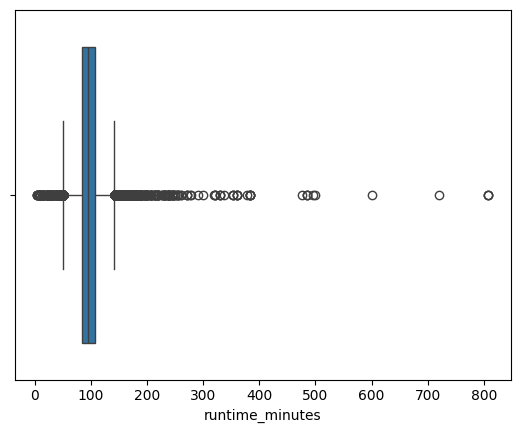

In [54]:
sns.boxplot(data = imdb, x = 'runtime_minutes');

Fingings: From the boxplot above we can observe there are outliers 

In [55]:
#selecting the rows with the outliers
imdb.loc[(imdb.runtime_minutes > 300) | (imdb.runtime_minutes < 30)]

#dropping the outliers
imdb = imdb.loc[(imdb.runtime_minutes <= 300) & (imdb.runtime_minutes >= 30)]

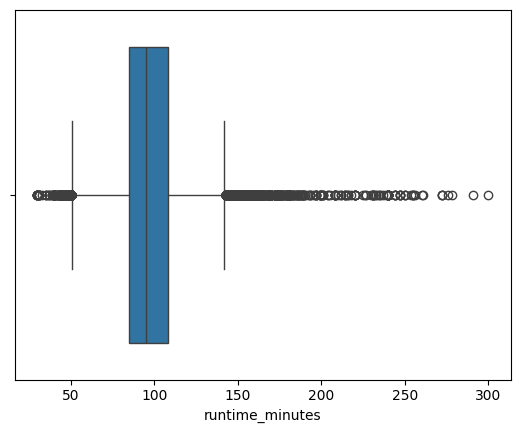

In [56]:
#previewing the new boxplot
sns.boxplot(data = imdb, x = 'runtime_minutes');

In [57]:
#Marching column names
#rename imdb column runtime_minutes to runtime
imdb.rename(columns = {'runtime_minutes':'runtime'}, inplace = True)
#rename imdb column genres to genre
imdb.rename(columns = {'genres':'genre'}, inplace = True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41866 entries, 0 to 181378
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            41866 non-null  object 
 1   primary_title       41866 non-null  object 
 2   original_title      41866 non-null  object 
 3   start_year          41866 non-null  int64  
 4   runtime             41866 non-null  float64
 5   genre               41866 non-null  object 
 6   averagerating       41866 non-null  float64
 7   numvotes            41866 non-null  int64  
 8   person_id           41866 non-null  object 
 9   primary_name        41866 non-null  object 
 10  birth_year          41866 non-null  float64
 11  death_year          41866 non-null  object 
 12  primary_profession  41866 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.5+ MB


In [58]:
# Now we merge all the csv datasets(bom_movies,rt_merged, imdb and tn_movie_budgets) to one dataframe
df = pd.concat([bom_movies,rt_reviews, imdb, tn_movie_budgets])
df

,title,studio,domestic_gross,foreign_gross,year,id,review,fresh,critic,top_critic,...,numvotes,person_id,primary_name,birth_year,death_year,primary_profession,release_date,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,$0,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Dec 31, 2018",Red 11,"$7,000",$0
5778,NaN,NaN,"$48,482",NaN,NaN,79.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,NaN,NaN,"$1,338",NaN,NaN,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,NaN,NaN,$0,NaN,NaN,81.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [59]:
# Check for duplicates 
check_duplicates(df)

There are 0 duplicated rows


## 5.Exploratory Analysis
This section deals with analysing the data and creating visualisations that answer the business questions that will lead to appropriate recommendations.
1. What Genres Perform Best at the Box Office?

2. How do budget sizes correlate with box office success, and what are the average production costs of the most successful films?

3. What is the Impact of Release Timing on Box Office Performance?

4. Which Studios are Producing the Most Successful Films?

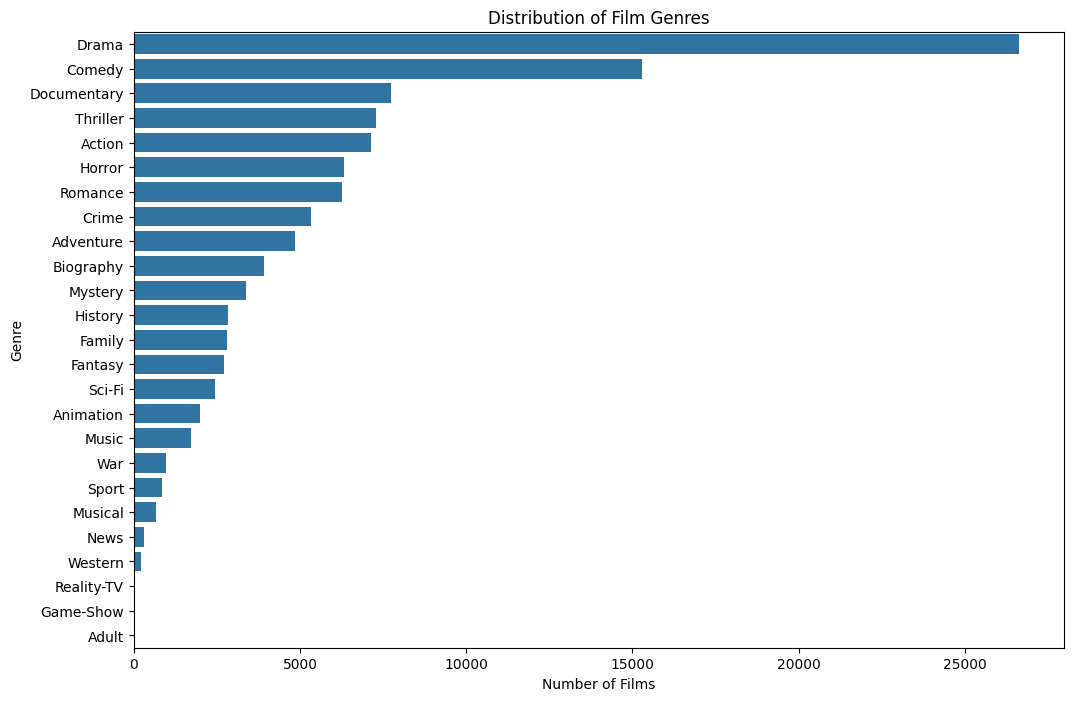

In [67]:
# What Genres Perform Best at the Box Office?
# Select relevant columns for analysis
relevant_columns = ['studio', 'genre', 'year']
df_cleaned = df[relevant_columns]

# Handling genres: Splitting and expanding the genres into separate rows
df_genres_expanded = df_cleaned.drop('genre', axis=1).join(
    df_cleaned['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
)

# Counting occurrences of each genre
genre_counts = df_genres_expanded['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Plotting the genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=genre_counts)
plt.title('Distribution of Film Genres')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.show()


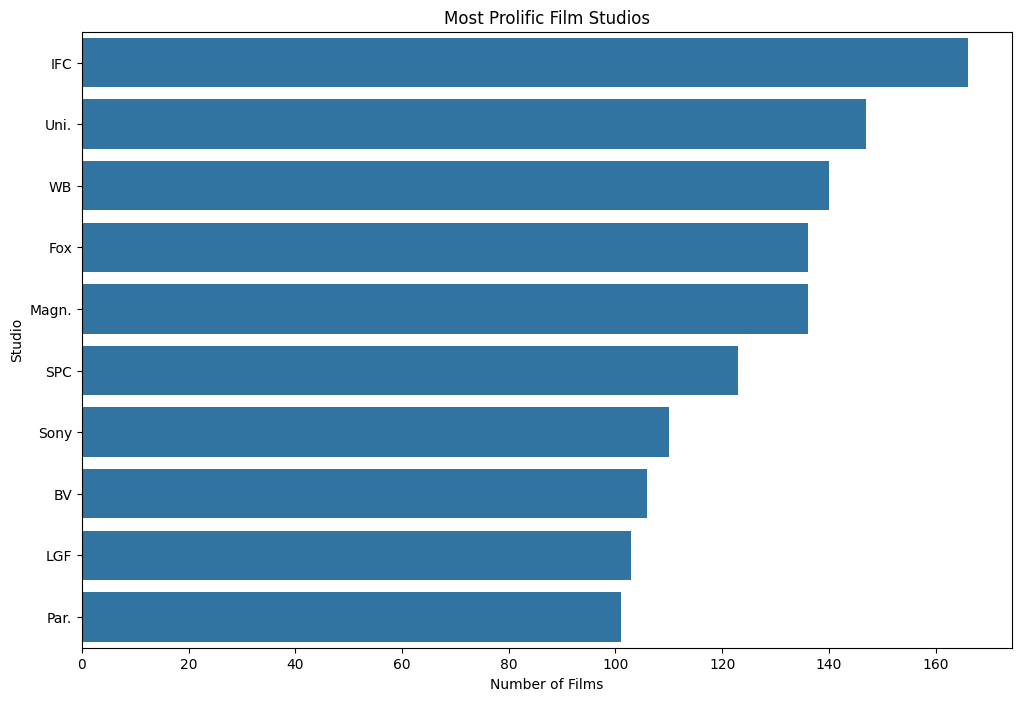

In [68]:
# How do budget sizes correlate with box office success, and what are the average production costs of the most successful films?

# Counting the number of films produced by each studio
studio_counts = df_cleaned['studio'].value_counts().reset_index()
studio_counts.columns = ['studio', 'count']

# Plotting the studio distribution (Top 10 studios)
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='studio', data=studio_counts.head(10))
plt.title('Most Prolific Film Studios')
plt.xlabel('Number of Films')
plt.ylabel('Studio')
plt.show()


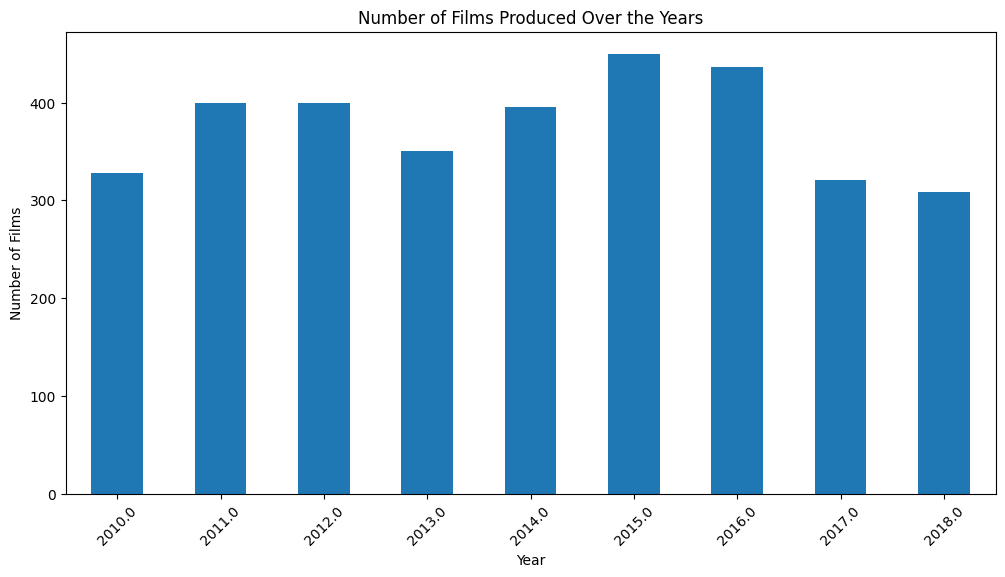

In [70]:
# What is the Impact of Release Timing on Box Office Performance?

# Counting the number of films produced each year
yearly_counts = df_cleaned['year'].value_counts().sort_index()
yearly_counts = yearly_counts[yearly_counts.index > 0]  # Filter out invalid years

# Plotting the number of films produced over the years
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')
plt.title('Number of Films Produced Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()


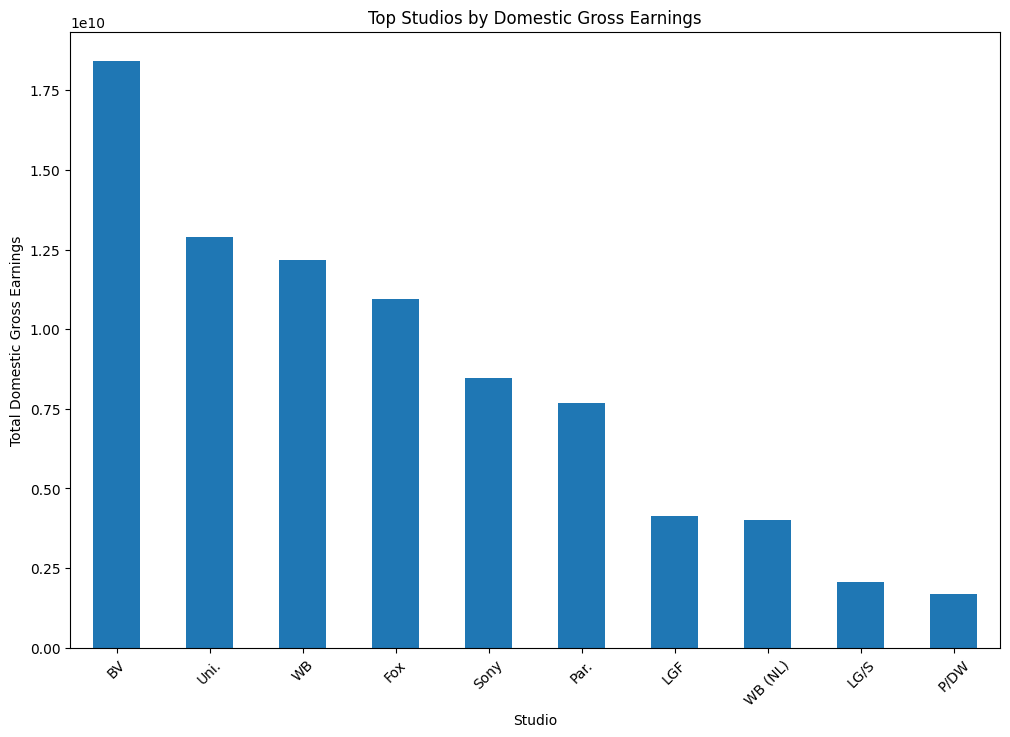

In [72]:
relevant_columns = ['studio', 'domestic_gross', 'foreign_gross', 'year']
df_cleaned = df[relevant_columns].copy()

# Convert numerical columns to numeric type and fill missing values with 0
numeric_cols = ['domestic_gross', 'foreign_gross']
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Aggregating box office earnings by studio
studio_performance = df_cleaned.groupby('studio')[numeric_cols].sum()

# Sorting studios by domestic and foreign gross earnings
studio_performance = studio_performance.sort_values(by='domestic_gross', ascending=False)

# Plotting the top 10 studios by domestic gross earnings
top_studios = studio_performance.head(10)
plt.figure(figsize=(12, 8))
top_studios['domestic_gross'].plot(kind='bar')
plt.title('Top Studios by Domestic Gross Earnings')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross Earnings')
plt.xticks(rotation=45)
plt.show()

## Conclusion
- Genre Distribution:

The most common film genres in the dataset were Drama and Comedy, followed by Documentaries, Thrillers, and Horror films. This distribution indicates a strong market presence and audience interest in these categories.

- Studio Activity:

The analysis identified studios with the highest number of film productions. Studios like IFC, Universal, and Warner Bros were among the most prolific, suggesting a significant role and influence in the film industry.

- Box Office Performance (Limited Analysis):

Due to data limitations, a comprehensive analysis of box office success was not feasible. However, the analysis of the available data indicated which studios had the highest aggregate domestic gross earnings, with a focus on the top performers.


## Recommendations for Microsoft

If Microsoft is considering entering the film industry, the following recommendations are suggested:

- Focus on Trending Genres:

Invest in producing films in popular genres like Drama and Comedy, which have shown consistent audience interest.
Also, consider exploring Documentaries and niche genres like Thrillers and Horror, which can cater to specific audience segments.

- Strategic Partnerships and Collaborations:

Collaborate with established and prolific studios to leverage their experience and distribution networks. This can help Microsoft gain a foothold in the industry.
Partner with studios that have a strong track record in the highest-grossing genres to maximize the potential success of initial ventures.

- Data-Driven Decisions:

Utilize Microsoft's expertise in data analytics to analyze market trends and audience preferences. This can guide decisions on film genres, themes, marketing strategies, and distribution channels.
Explore opportunities for innovation in content creation, distribution, and audience engagement using technology.

- Gradual Expansion and Diversification:

Start with a focused approach in popular genres and gradually expand into diverse genres and innovative film projects as market understanding deepens.
Consider a mix of blockbuster and independent film projects to balance potential high-reward ventures with creative, lower-risk films.

- Embrace Digital Transformation:

Leverage online platforms and streaming services, considering the shifting trends in how audiences consume content.
Explore opportunities in creating content not just for traditional cinema but also for digital-first platforms.